In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat('ex4data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
weights = loadmat('ex4weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [5]:
y = data['y']
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [6]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


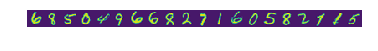

In [70]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample, 1:].reshape(-1, 20).T)
plt.axis('off');